<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Machine%20learning/Trees_and_ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Контекст
Вы работаете в отделе безопасности крупного банка. Перед вами стоит критически важная задача: разработать систему обнаружения мошеннических операций по кредитным картам в реальном времени. Для этого вам предоставили анонимизированный датасет транзакций.

Датасет: [Credit Card Fraud Detection]( https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier

from sklearn.metrics import f1_score, precision_recall_curve, classification_report, confusion_matrix

https://drive.google.com/file/d/1sh0P2nXA-18hK7RbBCc3qtB6yu79DsvL/view?usp=sharing

In [ ]:
! gdown 1sh0P2nXA-18hK7RbBCc3qtB6yu79DsvL  -q

In [ ]:
CREDIT_CARD = './creditcard.csv'
df = pd.read_csv(CREDIT_CARD, sep=',')

Постановка задачи
Проведите сравнительный анализ алгоритмов машинного обучения для задачи бинарной классификации транзакций на:

Легальные (Class = 0)

Мошеннические (Class = 1)

# Задача 1. Предобработка данных (1 балл)

- Изучите распределение целевой переменной (анализ дисбаланса классов). Постройте графики

- Проведите масштабирование признаков (V1-V28 уже нормализованы, но Time и Amount требуют обработки)

- Разделите данные на обучающую и тестовую выборки (учтите стратификацию из-за дисбаланса)

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**Изучите распределение целевой переменной (анализ дисбаланса классов). Постройте графики**

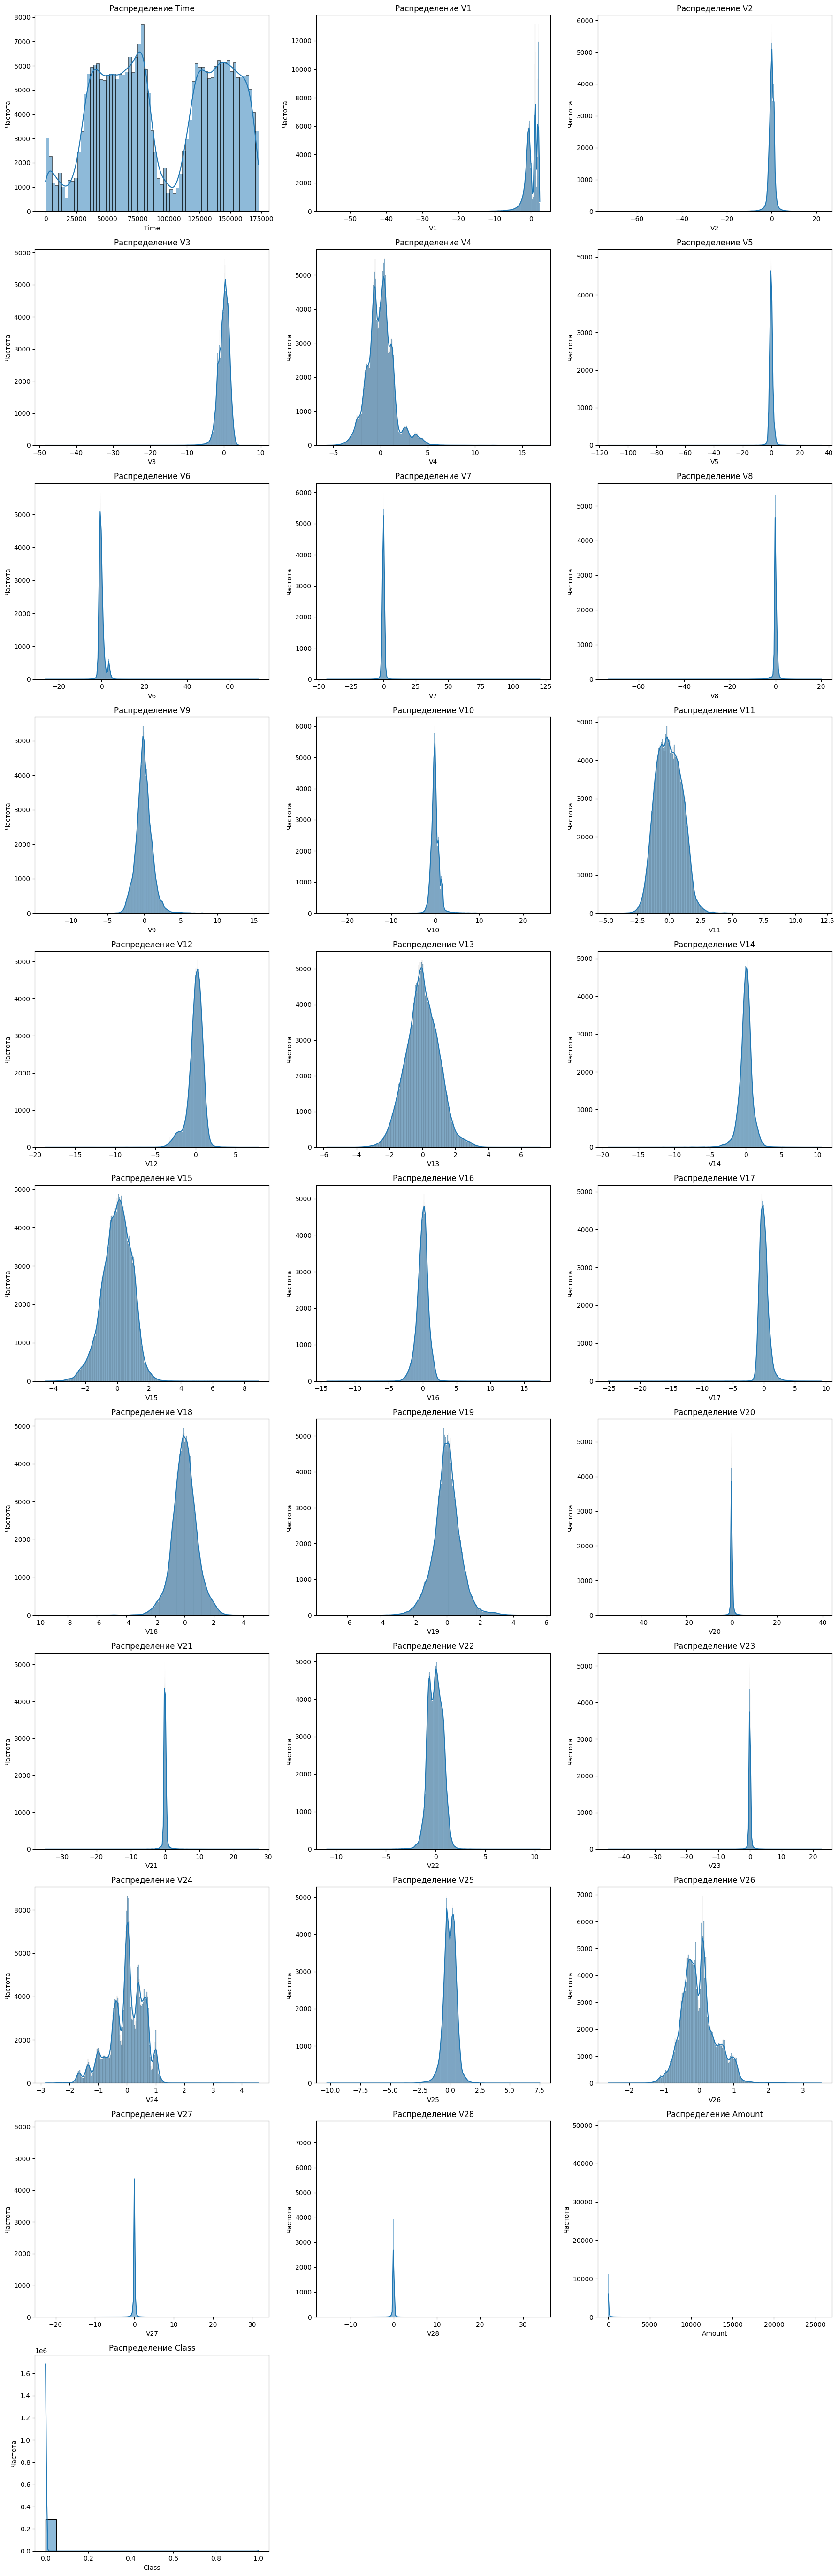

In [ ]:
# Изучим распределение всех фичей
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(18, 5*num_rows))
for i, column in enumerate(df.columns):
  plt.subplot(num_rows, 3, i + 1)
  sns.histplot(df[column], kde=True)
  plt.title(f'Распределение {column}')
  plt.xlabel(column)
  plt.ylabel('Частота')
plt.tight_layout()
plt.show()

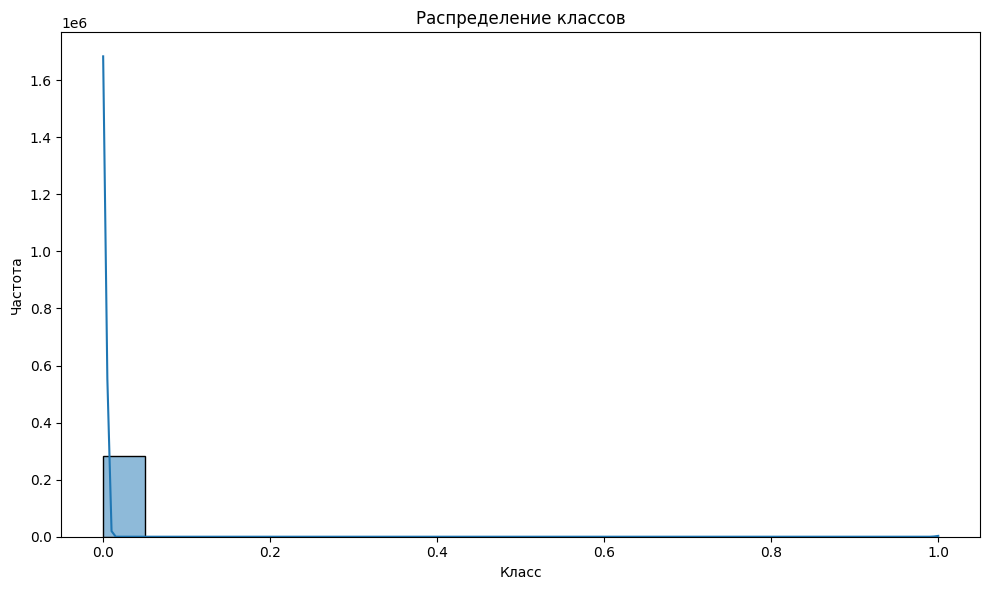

In [ ]:
# Распределение таргета
plt.figure(figsize=(10, 6))
sns.histplot(df['Class'], kde=True)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
class_balance = df.groupby('Class')['Amount'].count()
print('Распределение величин по соответствующим классам')
class_balance

Распределение величин по соответствующим классам


Class
0    284315
1       492
Name: Amount, dtype: int64

In [ ]:
print(f'Класс 0 составляет {class_balance[0] / len(df) * 100}% от датасета')
print(f'Класс 1 составляет {class_balance[1] / len(df) * 100}% от датасета')

Класс 0 составляет 99.82725143693798% от датасета
Класс 1 составляет 0.1727485630620034% от датасета


**Проведите масштабирование признаков (V1-V28 уже нормализованы, но Time и Amount требуют обработки)**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
cols = df.columns.tolist()

In [ ]:
def scale_df(df: pd.DataFrame,
             scaler,
             columns: list = None) -> pd.DataFrame:
  scaled_df = df.copy()
  if columns is None:
    columns = scaled_df.select_dtypes(include=[np.number]).columns.tolist()
  scaled_data = scaler.fit_transform(scaled_df[columns])
  scaled_data = pd.DataFrame(scaled_data, columns=columns, index=scaled_df.index)
  scaled_df = scaled_df.drop(columns=columns).join(scaled_data)
  return scaled_df

In [ ]:
scaler = StandardScaler()
df = scale_df(df, scaler, columns=['Time','Amount'])
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-1.996541,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-1.996499,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-1.996436,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,-1.996436,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-1.996394,-0.338516


**Разделите данные на обучающую и тестовую выборки (учтите стратификацию из-за дисбаланса)**

In [ ]:
y = df['Class']
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


Видим, что стратификация прошла успешно

In [ ]:
print('Обучающая выборка')
print(f'Класс 0 составляет {y_train[y_train == 0].count() / len(y_train) * 100}% от датасета')
print(f'Класс 1 составляет {y_train[y_train == 1].count() / len(y_train) * 100}% от датасета\n')

print('Валидационная выборка')
print(f'Класс 0 составляет {y_test[y_test == 0].count() / len(y_test) * 100}% от датасета')
print(f'Класс 1 составляет {y_test[y_test == 1].count() / len(y_test) * 100}% от датасета')

Обучающая выборка
Класс 0 составляет 99.82707542408215% от датасета
Класс 1 составляет 0.17292457591783889% от датасета

Валидационная выборка
Класс 0 составляет 99.82795547909133% от датасета
Класс 1 составляет 0.17204452090867595% от датасета


# Задача 2. Построение   моделей ( 2 балла)

Реализуйте следующие алгоритмы:

Базовые модели:

- Линейная регрессия (с пороговой функцией)

- kNN (k-ближайших соседей)

- Решающее дерево

Ансамблевые методы:

- Бэггинг (BaggingClassifier)

- Случайный лес (Random Forest)

- Стекинг (StackingClassifier) для моделей

  *   LogisticRegression,
  *  KNeighborsClassifier,
  *  DecisionTreeClassifier


Может долго работать, но примерно до 15-20 минут !

Для того, чтобы корректно сравнивать модели между собой, для каждой из них попытаемся определить оптимальные по f1_score параметры. В дальнейших заданиях после выбора лучшей модели уже можно будет подобрать их корректнее

## **Линейная регрессия (с пороговой функцией)**

In [ ]:
reg = LogisticRegression(class_weight='balanced', random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_prob = reg.predict_proba(X_test)[:,1]

У модели очень маленький показатель precision на классе "1" (0.06), в чем можем убедиться с помощью confusion matrix - 1389 FP, хотя это и не очень страшно, так как для модели определения фрода намного лучше, чтобы модель определяла операцию как мошенническую, чем пропускала её. Определим оптимальный порог.

In [ ]:
print(f'Classification report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion matrix:
[[55475  1389]
 [    8    90]]


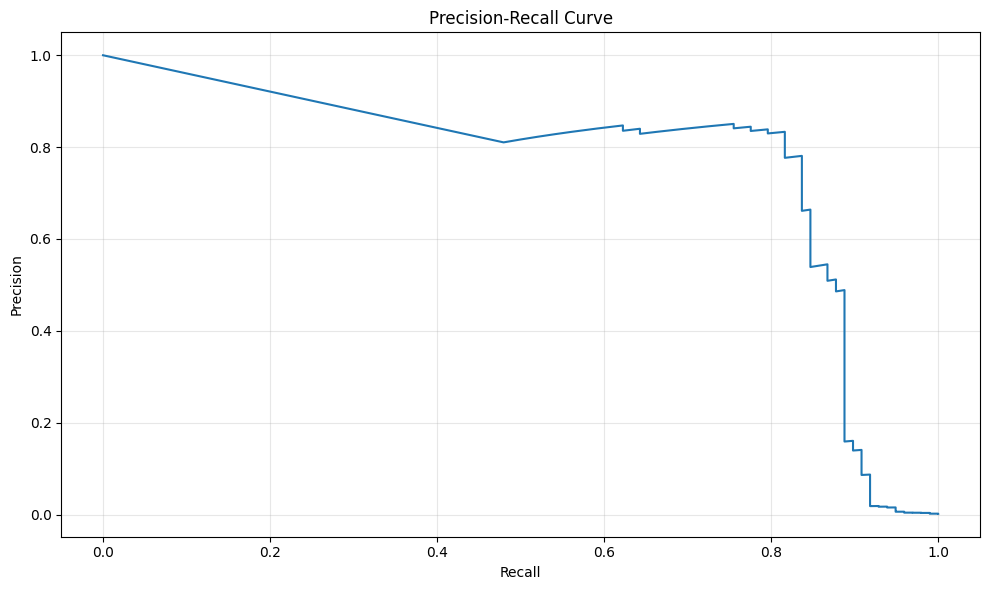

In [ ]:
# Построим Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10,6))
plt.plot(recalls, precisions)
plt.title('Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def get_best_threshold(y_test: pd.DataFrame, y_prob: list, steps: int = 300):
  thresholds = np.linspace(0, 1, 300)
  max_f1, max_threshold = 0, 0

  for threshold in thresholds:
    pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, pred)
    if f1 > max_f1:
      max_f1 = f1
      max_threshold = threshold
  return max_threshold

In [ ]:
max_threshold = get_best_threshold(y_test, y_prob)
print(f'Max threshold -> {max_threshold}')

Max threshold -> 0.9966555183946488


Видим, что recall незначительно опустился, но f1_score увеличился засчет десятикратного увеличения precision

In [ ]:
y_pred_reg = (y_prob >= max_threshold).astype(int)
reg_f1 = f1_score(y_test, y_pred_reg)
print(f'Classification report:\n{classification_report(y_test,y_pred_reg)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_reg)}')

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.85      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56815    49]
 [   15    83]]


## **kNN (k-ближайших соседей)**

При подборе оптимального количества соседей разобьем трейны на трейн и валидацию

In [ ]:
def get_best_k(X_train: pd.DataFrame, y_train: pd.DataFrame, min_k: int = 1, max_k: int = 20):
  X_tra, X_val, y_tra, y_val = train_test_split(
      X_train,
      y_train,
      test_size=0.2,
      random_state=42,
      stratify=y_train
  )
  ks = np.arange(min_k, max_k, step=2) # Пройдемся только по нечетным, чтобы сократить время поиска
  best_score = 0
  best_k = 0
  for k in tqdm(ks):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_tra, y_tra)
    y_pred = knn.predict(X_val)
    score = f1_score(y_val, y_pred)
    if score > best_score:
      best_score = score
      best_k = k
  return best_k

In [ ]:
best_k = get_best_k(X_train, y_train)

100%|██████████| 10/10 [01:20<00:00,  8.08s/it]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_f1 = f1_score(y_test, y_pred_knn)

In [ ]:
knn_f1

0.7955801104972375

Видим, что f1_score = 0.8, что на 0.08 больше этого показателя для логистической регрессии

In [ ]:
print(f'Classification report:\n {classification_report(y_test, y_pred_knn)}')

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.73      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## Решающее дерево

Так как для решающего дерева слишком много параметров сильно влияют на результат, воспользуемся GridSearchCV для удобства их подбора вместо использования обычного перебора в цикле, кроме того немного уменьшим трейн для сокращения времени подбора

In [ ]:
def get_best_decision_tree_params(X_train: pd.DataFrame, y_train: pd.DataFrame):
  X_tra, X_val, y_tra, y_val = train_test_split(
      X_train,
      y_train,
      test_size=0.2,
      random_state=42,
      stratify=y_train
  )
  params = {
      'max_depth' : [3, 5, 7, 9],
      'min_samples_split' : [3, 5, 10, 20],
      'min_samples_leaf' : [1, 3, 5, 10],
    }
  decision_tree = DecisionTreeClassifier(random_state=42)
  grid_tree = GridSearchCV(
      decision_tree,
      params,
      scoring='f1',
      cv=3,
      n_jobs=-1
    )
  grid_tree.fit(X_tra, y_tra)
  return grid_tree.best_params_

In [ ]:
best_decision_tree = get_best_decision_tree_params(X_train, y_train)

In [ ]:
decision_tree = DecisionTreeClassifier(
    **best_decision_tree,
    random_state=42
)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
dt_f1 = f1_score(y_test, y_pred_dt)

In [ ]:
print(f'Decision tree f1_score -> {dt_f1}')

Decision tree f1_score -> 0.8351648351648352


После подбора параметров получили f1_score = 0.78 для класса "1"

In [ ]:
print(f'Classification report:\n {classification_report(y_test, y_pred_dt)}')

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## Бэггинг (BaggingClassifier)

In [ ]:
def get_best_estimators(best_dt_params: dict, X_train, y_train):
  X_tra, X_val, y_tra, y_val = train_test_split(
      X_train,
      y_train,
      test_size=0.2,
      random_state=42,
      stratify=y_train
  )
  best_f1 = 0
  best_est = 0
  estimators = [20, 30, 40, 50]
  for n in tqdm(estimators):
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(
            **best_dt_params,
            random_state=42
        ),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bagging.fit(X_tra, y_tra)
    y_pred = bagging.predict(X_val)
    score = f1_score(y_val, y_pred)
    if score > best_f1:
      best_f1 = score
      best_est = n
  return best_est

In [ ]:
best_nest = get_best_estimators(best_decision_tree, X_train, y_train)

100%|██████████| 4/4 [01:08<00:00, 17.07s/it]


In [ ]:
bagging_tree = BaggingClassifier(
    estimator=DecisionTreeClassifier(
            **best_decision_tree,
            random_state=42
        ),
        n_estimators=best_nest,
        random_state=42,
        n_jobs=-1
)
bagging_tree.fit(X_train, y_train)
y_pred_bt = bagging_tree.predict(X_test)
bt_f1 = f1_score(y_test, y_pred_bt)

In [ ]:
print(f'Bagging f1_score -> {bt_f1}')

Bagging f1_score -> 0.8829787234042553


In [ ]:
print(f'Classification report:\n {classification_report(y_test, y_pred_bt)}')

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Случайный лес (Random Forest)

In [ ]:
def get_best_forest_params(best_dt_params: dict, X_train: pd.DataFrame, y_train: pd.DataFrame):
  X_tra, X_val, y_tra, y_val = train_test_split(
      X_train,
      y_train,
      test_size=0.2,
      random_state=42,
      stratify=y_train
  )
  best_f1 = 0
  best_est = 0
  estimators = [100, 150, 200]
  for n in tqdm(estimators):
    forest = RandomForestClassifier(
        n_estimators=n,
        random_state=42,
        n_jobs=-1,
        **best_dt_params
    )
    forest.fit(X_tra, y_tra)
    y_pred = forest.predict(X_val)
    score = f1_score(y_val, y_pred)
    if score > best_f1:
      best_f1 = score
      best_est = n
  return best_est

In [ ]:
best_random_forest_params = get_best_forest_params(best_decision_tree,X_train, y_train)

100%|██████████| 3/3 [00:34<00:00, 11.58s/it]


In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=best_random_forest_params,
    random_state=42,
    n_jobs=-1,
    **best_decision_tree
)
random_forest.fit(X_train, y_train)
y_pred_rf = bagging_tree.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf)

In [ ]:
print(f'Random forest f1_score -> {rf_f1}')

Random forest f1_score -> 0.8829787234042553


In [ ]:
print(f'Classification report:\n {classification_report(y_test, y_pred_rf)}')

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Стекинг (StackingClassifier) для моделей

LogisticRegression,
KNeighborsClassifier,
DecisionTreeClassifier

In [ ]:
stacking = StackingClassifier(
    estimators=[
        ('logistic_reg', reg),
        ('knn', knn),
        ('decision_tree', decision_tree)
    ],
    final_estimator=LogisticRegression(
        random_state=42,
        max_iter=1000,
    ),
    cv=3,
    n_jobs=-1
)
stacking.fit(X_train, y_train)
y_prob_st = stacking.predict_proba(X_test)[:, 1]
stacking_threshold = get_best_threshold(y_test, y_prob_st)
y_pred_st = (y_prob_st >= stacking_threshold).astype(int)
st_f1 = f1_score(y_test, y_pred_st)

In [ ]:
print(f'stacking f1_score -> {st_f1}')

stacking f1_score -> 0.8602150537634409


In [ ]:
print(f'Classification report:\n {classification_report(y_test, y_pred_st)}')

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
models ={
    'linear_reg' : reg_f1,
    'knn' : knn_f1,
    'decision_tree' : dt_f1,
    'bagging' : bt_f1,
    'random_forest' : rf_f1,
    'stacking' : st_f1
}
best_model = max(models, key=models.get)
print(f'Лучшая модель -> {best_model}')
print(f'F1_score -> {models[best_model]}')

Лучшая модель -> bagging
F1_score -> 0.8829787234042553


# Задача 3. Оценка моделей ( 2 балла )

Для каждой модели рассчитайте:

- Precision и Recall

- F1-score (основная метрика из-за дисбаланса)

- ROC-AUC

- Матрицу ошибок (Confusion Matrix)

Подсказка: Мы оцениваем на тестовой выборке

Выводы:

# Задача 4. Сравнительный анализ ( 1 балл)

Создайте сводную таблицу со всеми метриками и проведите анализ:

- Какая модель показывает наилучшее качество?

- Какие модели лучше обнаруживают мошеннические транзакции (высокий recall)?

- Какие модели минимизируют ложные срабатывания (высокий precision)?

Ответы:

# Задача 5. Углубленный анализ ошибок ( 2 балла)
- Проанализируйте ложно-положительные и ложно-отрицательные случаи лучшей модели

- Определите паттерны в транзакциях, которые модель классифицирует неправильно

- Визуализируйте распределение ошибок по признакам Amount и Time

Выводы:

# Задача 6. Подбор гиперпараметров (2 балла)

- Подберите оптимальные гиперпараметры с помощью [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) для лучшей модели.
-  Построй модель с лучшими параметрами и оцени
- Напиши выводы о лучшей модели.

Выводы: